In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
ToyotaCorolla=pd.read_csv("C:/Users/icon/Downloads/ToyotaCorolla.csv")
ToyotaCorolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
ToyotaCorolla=
ToyotaCorollaToyotaCorolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
#check for missing values
ToyotaCorolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
ToyotaCorolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


## Correlation Matrix

In [7]:
ToyotaCorolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


## Scatter plot between variables and Histogram

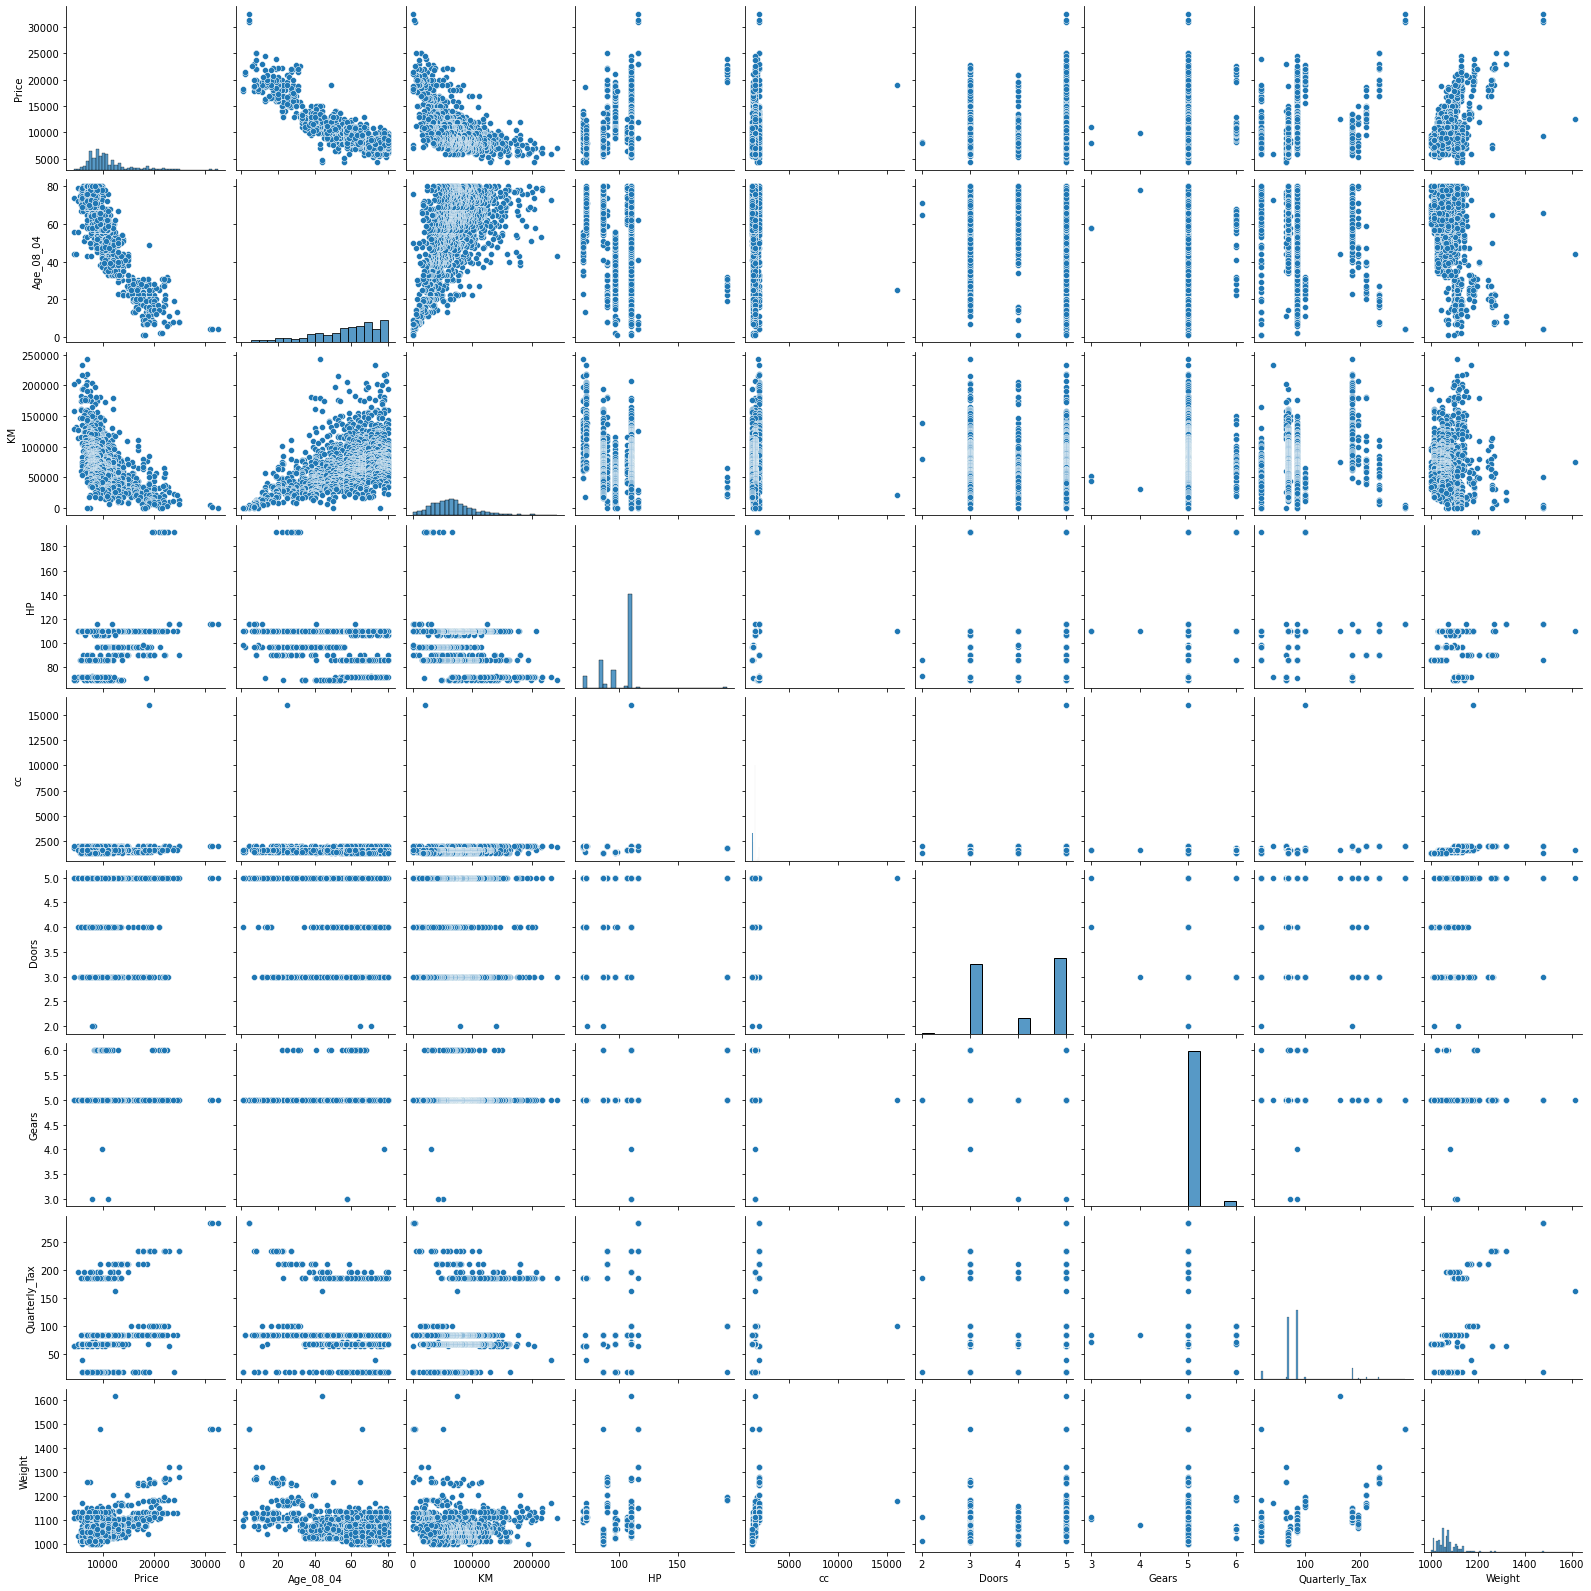

In [8]:
sns.pairplot(ToyotaCorolla)

<AxesSubplot:>

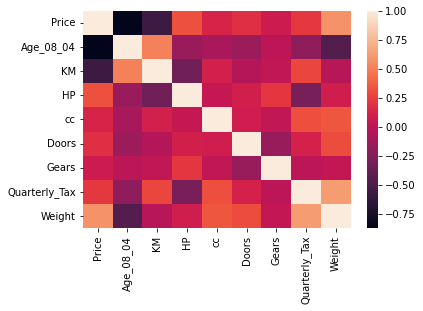

In [10]:
sns.heatmap(ToyotaCorolla.corr())

## Preparing a Model 

In [11]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=ToyotaCorolla).fit()

In [12]:
#Coefficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

## Simple Linear Regression Model

In [15]:
ml_v=smf.ols('Price~cc',data =ToyotaCorolla ).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [16]:
ml_v=smf.ols('Price~Doors',data =ToyotaCorolla ).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [17]:
ml_v=smf.ols('Price~cc+Doors',data =ToyotaCorolla ).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


## Calculating VIF

In [18]:
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=ToyotaCorolla).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04)

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=ToyotaCorolla).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=ToyotaCorolla).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=ToyotaCorolla).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=ToyotaCorolla).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=ToyotaCorolla).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=ToyotaCorolla).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)

rsq_Weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=ToyotaCorolla).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)

# Storing vif values in a data frame
d1 = {'Variables':["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


# Residual Analysis

## Test for Normalityof Residuals (Q-Q plot)

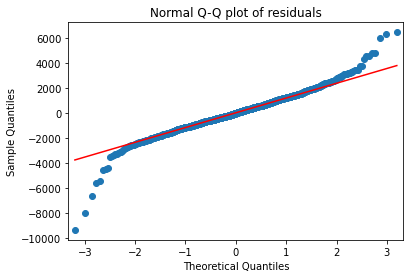

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [20]:
residuals=model.resid
residuals

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

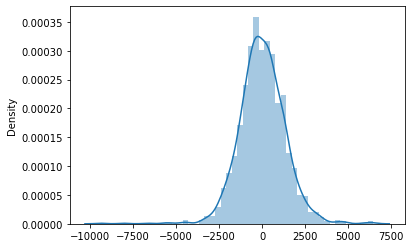

In [21]:
sns.distplot(residuals)

## Residual Plot for Homoscedasticity

In [22]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

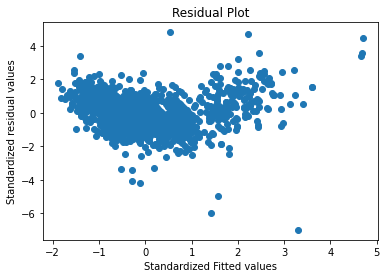

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


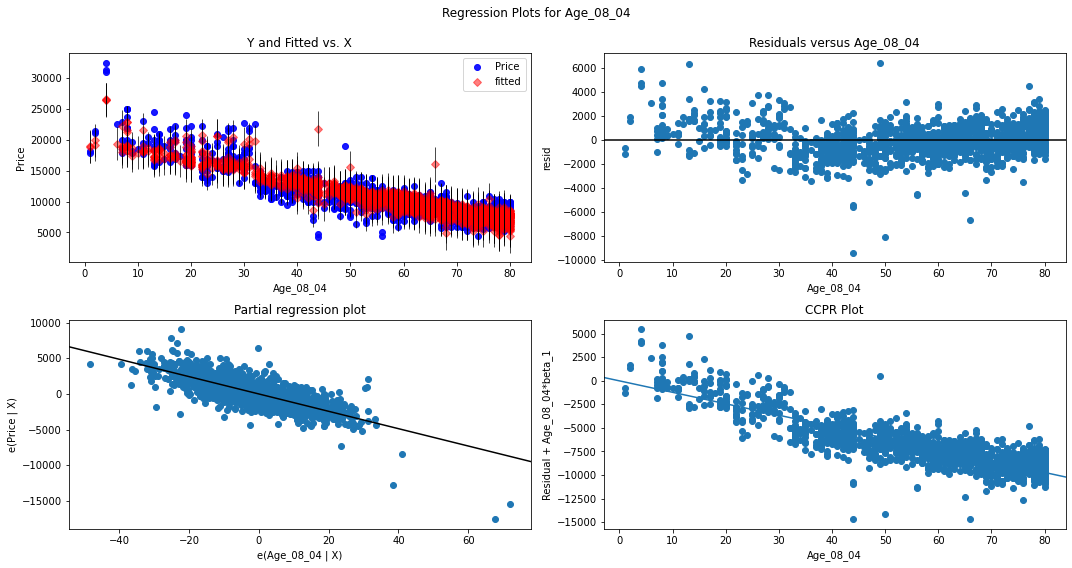

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


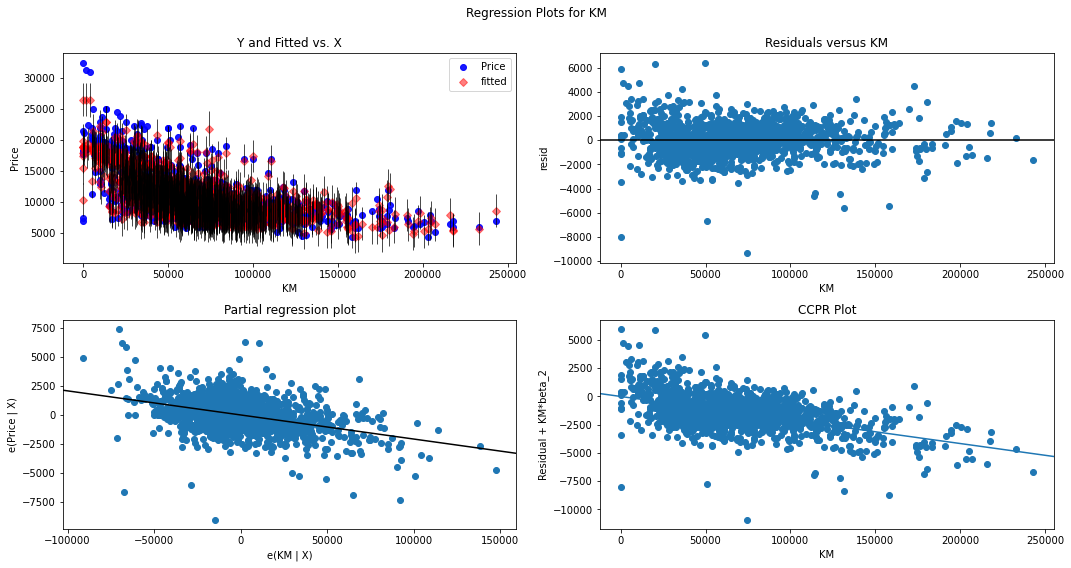

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


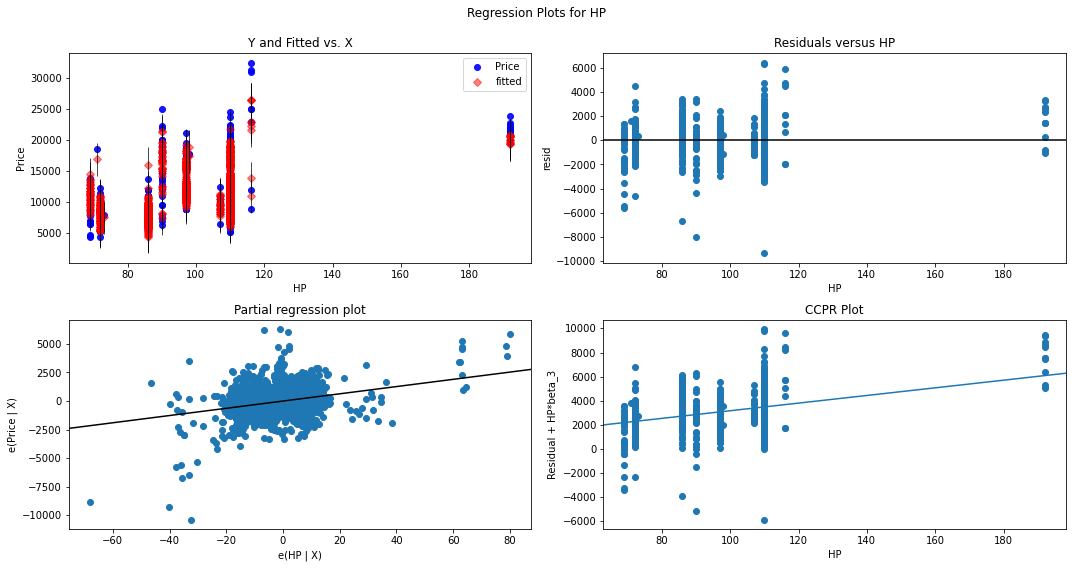

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


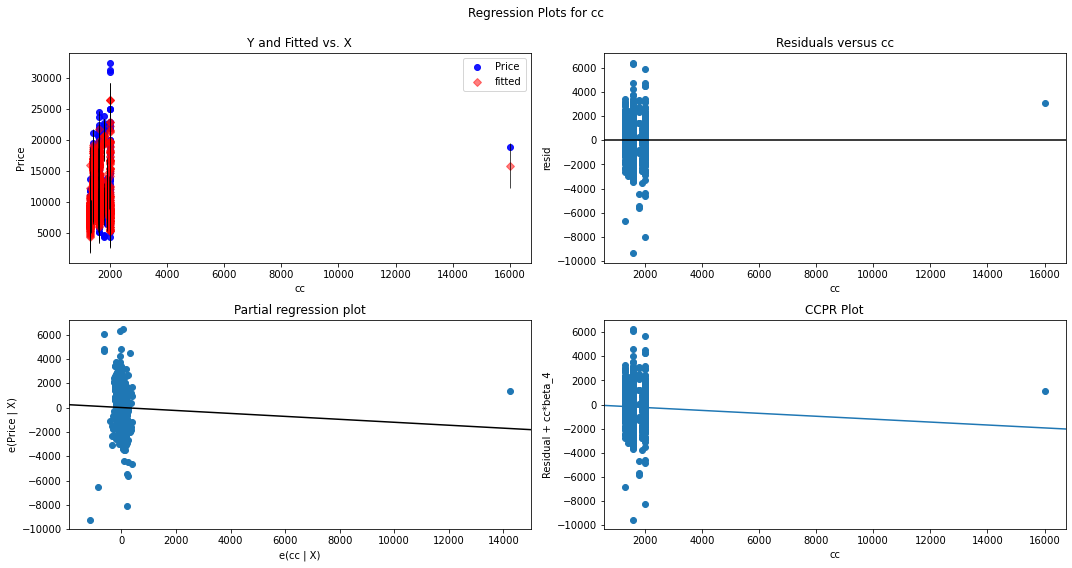

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


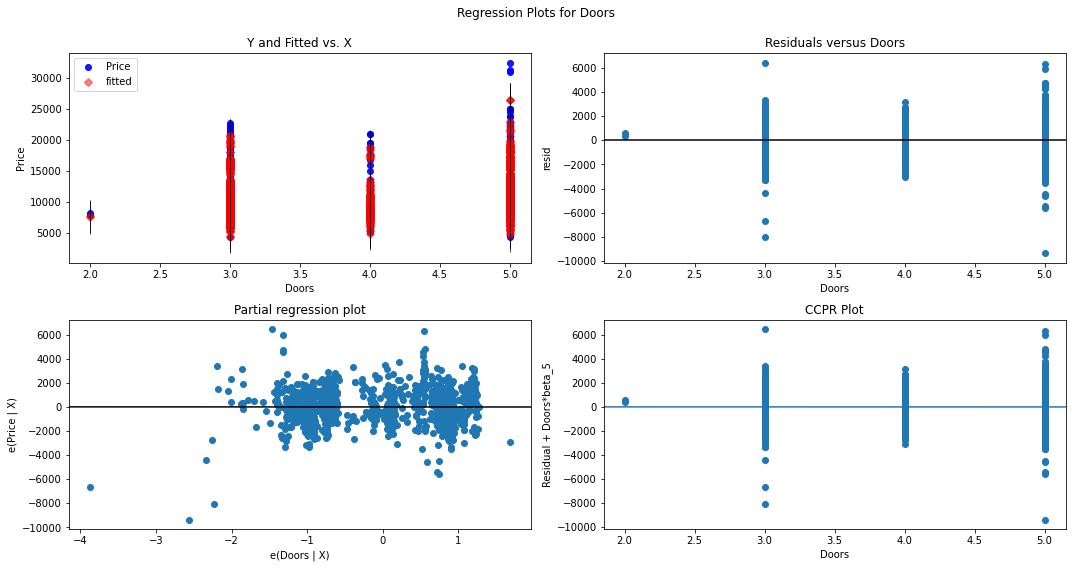

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


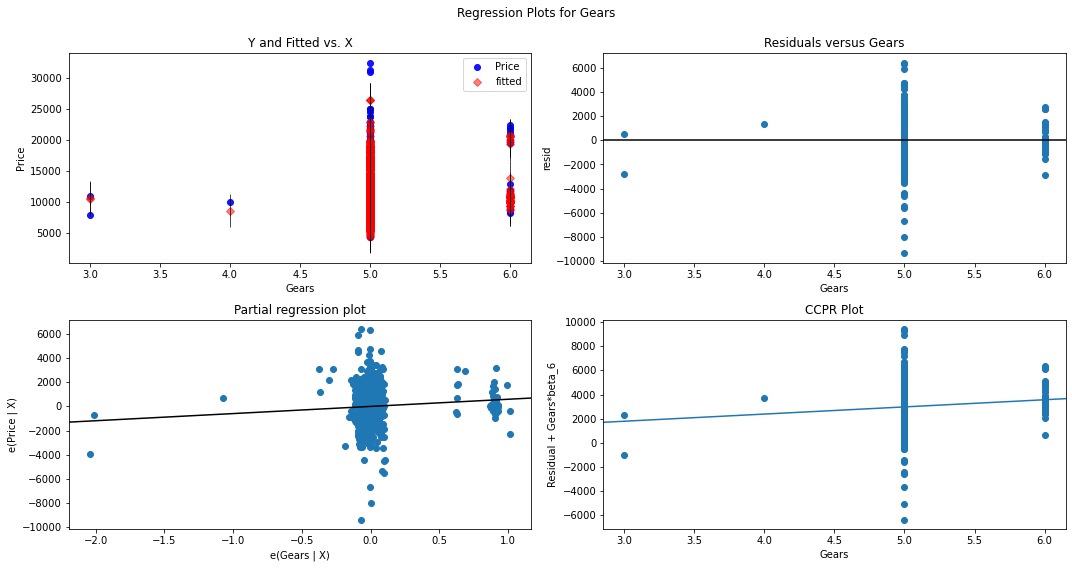

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


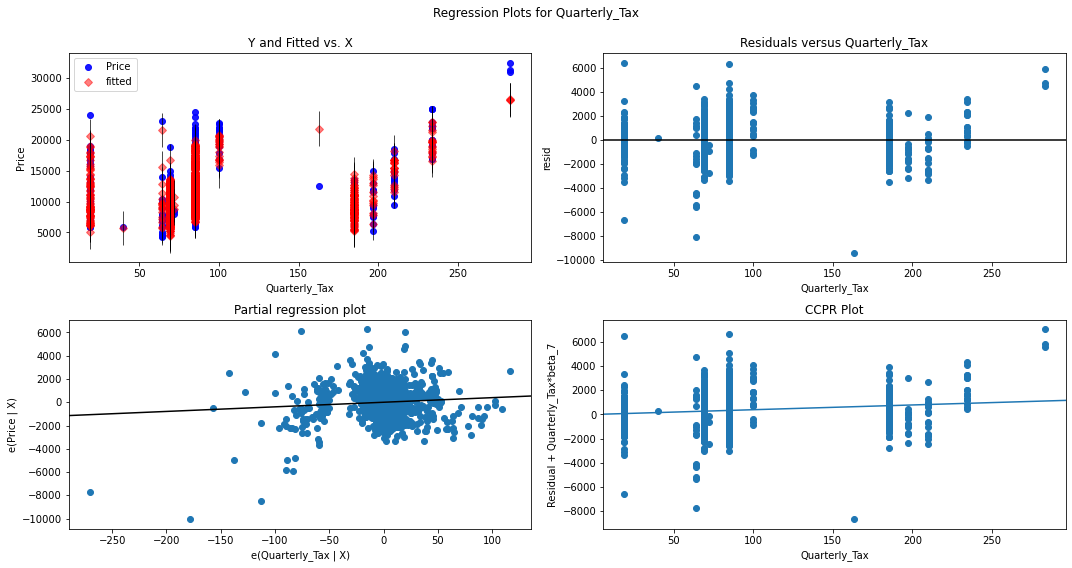

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


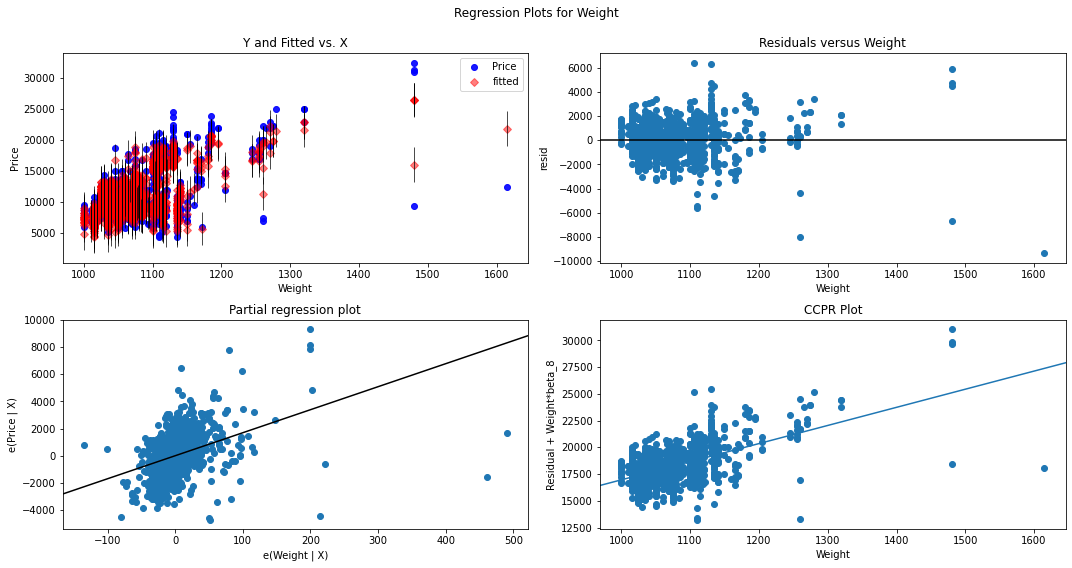

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook's Distance

In [32]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

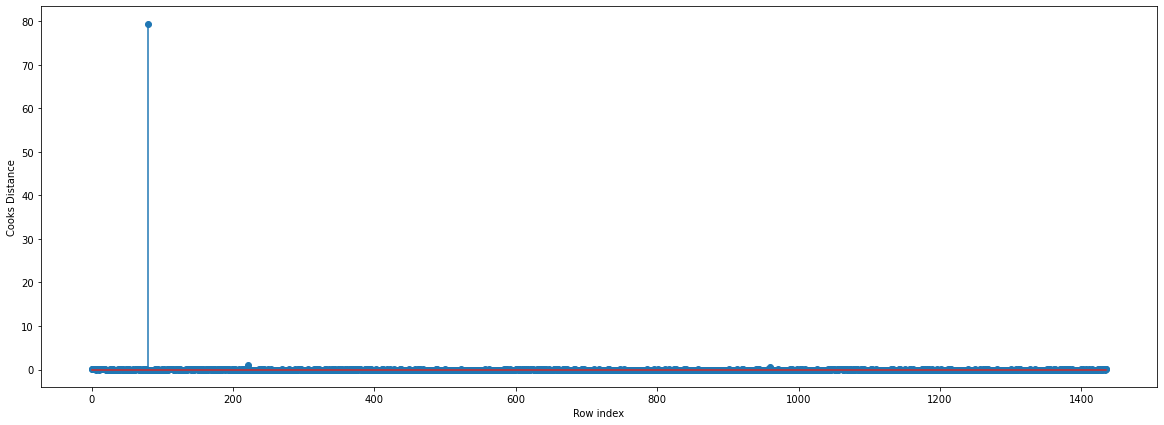

In [33]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(ToyotaCorolla)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.5201062414281)

## High Influence Point 

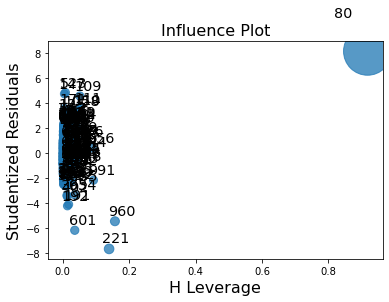

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

### From the above plot, it is evident that data point 80 is the influencers

In [37]:
ToyotaCorolla[ToyotaCorolla.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [38]:
#See the differences in HP and other variable values
ToyotaCorolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Improving the Model

In [54]:
#Load the data
ToyotaCorolla_new=pd.read_csv("C:/Users/icon/Downloads/ToyotaCorolla.csv")
ToyotaCorolla_new=ToyotaCorolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [55]:
#Discard the data points which are influencers and reasign the row number (reset_index())
ToyotaCorolla1=ToyotaCorolla_new.drop(ToyotaCorolla_new.index[[80]],axis=0).reset_index()
ToyotaCorolla1

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [56]:
#Drop the original index
ToyotaCorolla1=ToyotaCorolla1.drop(['index'],axis=1)

In [57]:
ToyotaCorolla1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


## Build Model

In [58]:
# generate R-Squared and AIC values
final_ml= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data =ToyotaCorolla1).fit()

In [59]:
(final_ml.rsquared,final_ml.aic)

(0.8693790488655818, 24687.28102432684)

## Cook's Distance

In [60]:
model_influence = final_ml.get_influence()
(c_, _) = model_influence.cooks_distance

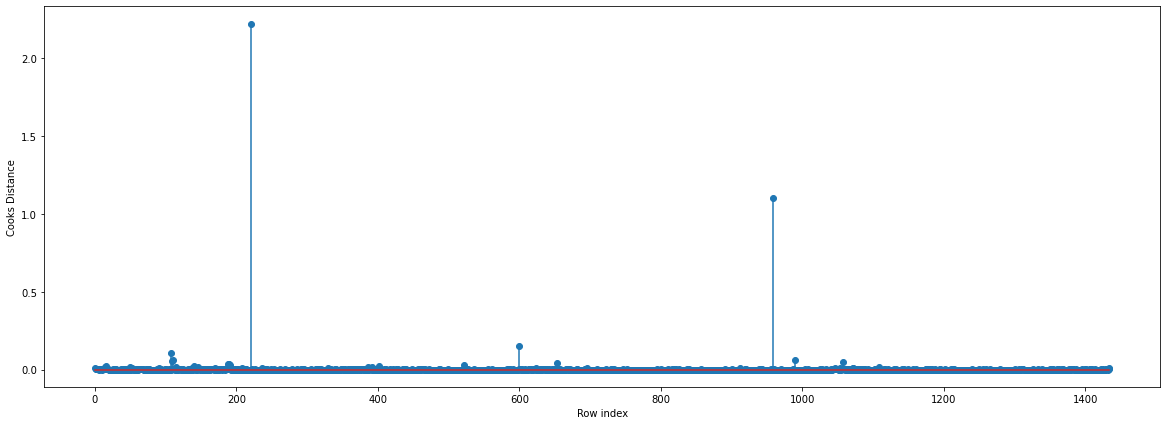

In [61]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(ToyotaCorolla1)),np.round(c_,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [62]:
#index of the data points where c is more than .5
(np.argmax(c_),np.max(c_))

(220, 2.2244611713004985)

In [65]:
#Drop 220 observations
ToyotaCorolla2=ToyotaCorolla1.drop(ToyotaCorolla1.index[[220]],axis=0)
ToyotaCorolla2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [66]:
#Reset the index and re arrange the row values
ToyotaCorolla3=ToyotaCorolla2.reset_index()

In [67]:
ToyotaCorolla4=ToyotaCorolla3.drop(['index'],axis=1)
ToyotaCorolla4

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [68]:
#Build the model on the new data
final_ml_= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data =ToyotaCorolla4).fit()

In [69]:
#Again check for influencers
model_influence_ = final_ml_.get_influence()
(c_, _) = model_influence_.cooks_distance

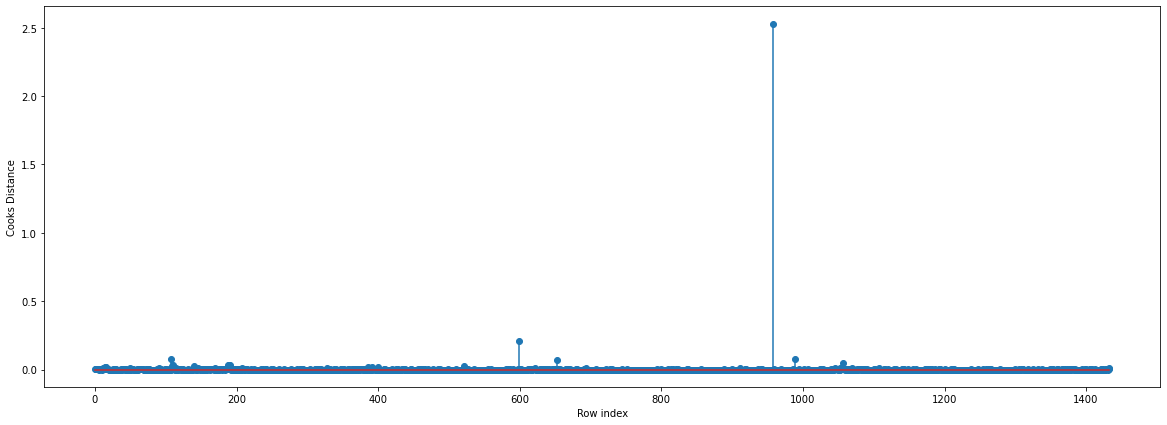

In [70]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(ToyotaCorolla4)),np.round(c_,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [71]:
#index of the data points where c is more than .5
(np.argmax(c_),np.max(c_))

(958, 2.531256693023236)

In [73]:
#Drop 958 observations
ToyotaCorolla3=ToyotaCorolla2.drop(ToyotaCorolla2.index[[958]],axis=0)
ToyotaCorolla3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [74]:
#Reset the index and re arrange the row values
ToyotaCorolla4=ToyotaCorolla3.reset_index()

In [76]:
ToyotaCorolla5=ToyotaCorolla4.drop(['index'],axis=1)
ToyotaCorolla5

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [77]:
#Build the model on the new data
final_ml_= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data =ToyotaCorolla5).fit()

In [78]:
#Again check for influencers
model_influence_ = final_ml_.get_influence()
(c_, _) = model_influence_.cooks_distance

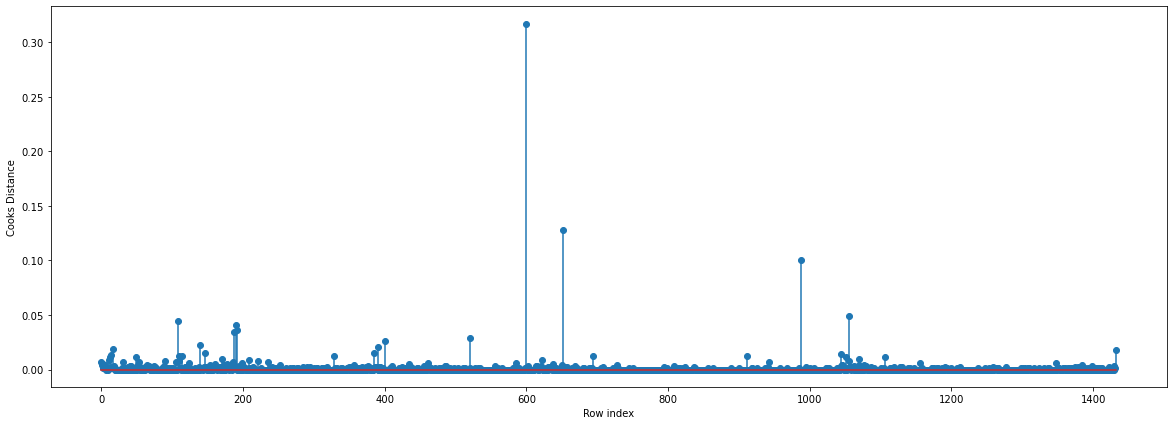

In [79]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(ToyotaCorolla5)),np.round(c_,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [80]:
#index of the data points where c is more than .5
(np.argmax(c_),np.max(c_))

(599, 0.31661315281442143)

In [85]:
#Drop 599 observations
ToyotaCorolla4=ToyotaCorolla3.drop(ToyotaCorolla3.index[[599]],axis=0)
ToyotaCorolla4

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [86]:
#Reset the index and re arrange the row values
ToyotaCorolla5=ToyotaCorolla4.reset_index()

In [87]:
ToyotaCorolla6=ToyotaCorolla5.drop(['index'],axis=1)
ToyotaCorolla6

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [88]:
#Build the model on the new data
final_ml_= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data =ToyotaCorolla6).fit()

In [89]:
#Again check for influencers
model_influence_ = final_ml_.get_influence()
(c_, _) = model_influence_.cooks_distance

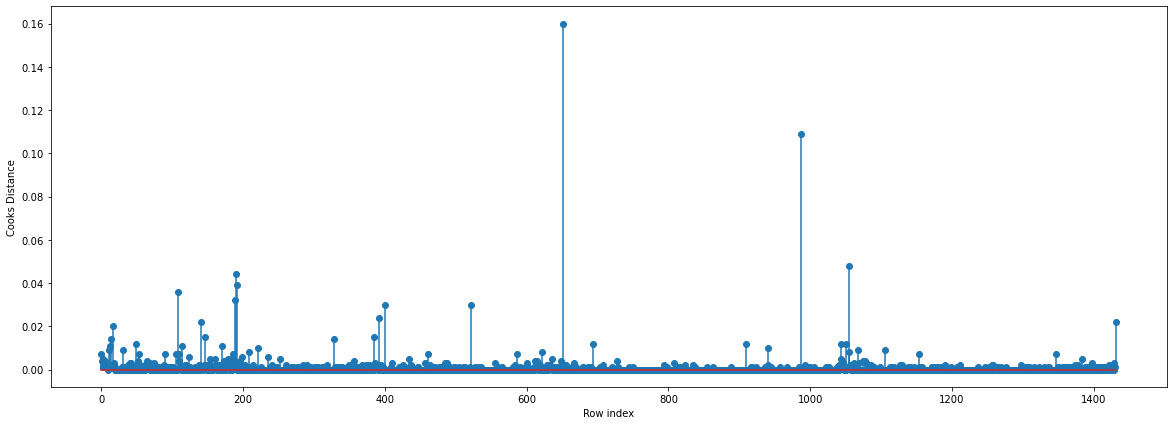

In [90]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(ToyotaCorolla6)),np.round(c_,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [92]:
#index of the data points where c is more than .5
(np.argmax(c_),np.max(c_))

(651, 0.16031135298930782)

## Since the value is <1 , we can stop the diagnostic process and finalize the model

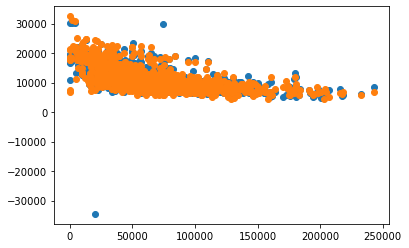

In [97]:
plt.scatter(ToyotaCorolla.KM,final_ml_.predict(ToyotaCorolla))
plt.scatter(ToyotaCorolla.KM,ToyotaCorolla.Price)
plt.show()

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KM', ylabel='Price'>

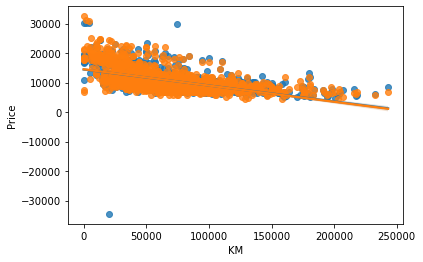

In [98]:
sns.regplot(ToyotaCorolla.KM,final_ml_.predict(ToyotaCorolla))
sns.regplot(ToyotaCorolla.KM,ToyotaCorolla.Price)

### Predicting for new data 

In [108]:
#New data for prediction
new_data=pd.DataFrame({"Age_08_04":23,"KM":45621,"HP":90,"cc":1600,"Doors":3,"Gears":5,"Quarterly_Tax":210,"Weight":1170},index=[1])

In [109]:
pred_y=final_ml_.predict(new_data)
pred_y

1    18011.185656
dtype: float64

In [107]:
pred_y1=final_ml_.predict(ToyotaCorolla)
pred_y1

0       16351.012991
1       15891.824421
2       16334.021007
3       16002.080259
4       15889.835926
            ...     
1431     9161.797882
1432     8536.169181
1433     8681.605150
1434     8793.704782
1435    10863.423359
Length: 1436, dtype: float64

In [111]:
pred_y1[578]

11003.840568846237